# Cis contact heatmap
In this section, we demonstrate how to generate various types of Hi-C cis contact heatmaps

In [1]:
from imp import reload
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import cooler
sys.path.append('/Users/yuanzan/Documents/github/seqyuan/trackc/src/')

import trackc as tc

HPDE6C7_chr18_25k = cooler.Cooler('/Users/yuanzan/Documents/github/seqyuan/trackc_data/HPDE6C7.chr18.mcool::/resolutions/25000')
BxPC3_chr18_25k = cooler.Cooler('/Users/yuanzan/Documents/github/seqyuan/trackc_data/BxPC3.chr18.mcool::/resolutions/25000')


HPDE6C7_chr18_2 = cooler.Cooler('/Users/yuanzan/Documents/github/seqyuan/trackc_data/HPDE6C7.chr18.mcool::/resolutions/50000')
BxPC3_chr18_2 = cooler.Cooler('/Users/yuanzan/Documents/github/seqyuan/trackc_data/BxPC3.chr18.mcool::/resolutions/50000')


/Users/yuanzan/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [1]:
#tc.pa.fruitpunch

In [3]:
region="18:10000000-15000000"

normal = tc.tl.extractCisContact(clr=HPDE6C7_chr18_25k, region=region, extend=0)
tumor = tc.tl.extractCisContact(clr=BxPC3_chr18_25k, region=region, extend=50)

no max min range
maxrange: 667.1399999999994 minrange: 1.0
no max min range
maxrange: 667.1399999999994 minrange: 1.0
no max min range
maxrange: 516.0800000000017 minrange: 1.0
no max min range
maxrange: 516.0800000000017 minrange: 1.0
no max min range
maxrange: 667.1399999999994 minrange: 1.0
no max min range
maxrange: 516.0800000000017 minrange: 1.0
no max min range
maxrange: 516.0800000000017 minrange: 1.0
no max min range
maxrange: 516.0800000000017 minrange: 1.0
1111 10000000 15000000
1111 10000000 15000000


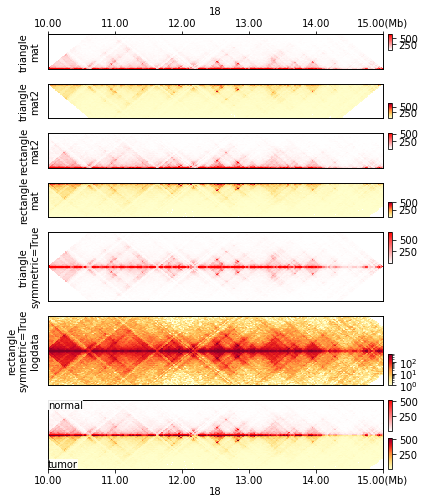

In [4]:
fig, axs = tc.make_spec(figsize=(6, 8), height_ratios=[1,1,1,1,2,2,2], hspace=0.3)

tc.pl.mapC(ax=axs[0], mat=normal, label='triangle\nmat', 
           map_type='triangle',  height=50)
tc.pl.mapC(ax=axs[1], mat2=normal, label='triangle\nmat2', 
           map_type='triangle',  height=50)

tc.pl.mapC(ax=axs[2], mat=tumor, label='rectangle\nmat2', 
           map_type='rectangle', height=50)
tc.pl.mapC(ax=axs[3], mat2=tumor, label='rectangle\nmat',
           map_type='rectangle', height=50)

tc.pl.mapC(ax=axs[4], mat=normal, label='triangle\nsymmetric=True',
           map_type='triangle',  height=50, symmetric=True)
tc.pl.mapC(ax=axs[5], mat2=tumor, label='rectangle\nsymmetric=True\nlogdata',
           map_type='rectangle', height=50, symmetric=True, logdata=True)

tc.pl.mapC(ax=axs[6], mat=tumor, mat2=tumor, label=['normal', 'tumor'],
           map_type='rectangle', height=50, symmetric=True)


tc.pl.scale_track(axs[6], region=region, scale_adjust='Mb', tick_pos='bottom', ratio2ax=0.4)
tc.pl.scale_track(axs[0], region=region, scale_adjust='Mb', tick_pos='top', ratio2ax=0.8)


no max min range
maxrange: 667.1399999999994 minrange: 1.0
no max min range
maxrange: 667.1399999999994 minrange: 1.0
no max min range
maxrange: 516.0800000000017 minrange: 1.0
no max min range
maxrange: 516.0800000000017 minrange: 1.0
no max min range
maxrange: 667.1399999999994 minrange: 1.0
no max min range
maxrange: 516.0800000000017 minrange: 1.0
no max min range
maxrange: 516.0800000000017 minrange: 1.0
no max min range
maxrange: 516.0800000000017 minrange: 1.0


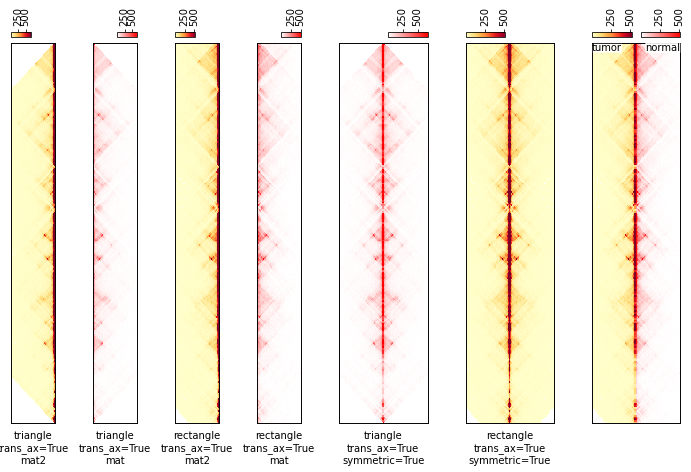

In [6]:
fig, axs = tc.make_spec(figsize=(12,7), width_ratios=[1,1,1,1,2,2,2], wspace=0.6)


tc.pl.mapC(ax=axs[0], mat2=normal, label='triangle\ntrans_ax=True\nmat2', 
           map_type='triangle',  height=50, trans_ax=True)
tc.pl.mapC(ax=axs[1], mat=normal, label='triangle\ntrans_ax=True\nmat', 
           map_type='triangle',  height=50, trans_ax=True)

tc.pl.mapC(ax=axs[2], mat2=tumor, label='rectangle\ntrans_ax=True\nmat2', 
           map_type='rectangle', height=50, trans_ax=True)
tc.pl.mapC(ax=axs[3], mat=tumor, label='rectangle\ntrans_ax=True\nmat',
           map_type='rectangle', height=50, trans_ax=True)

tc.pl.mapC(ax=axs[4], mat=normal, label='triangle\ntrans_ax=True\nsymmetric=True',
           map_type='triangle',  height=50, trans_ax=True, symmetric=True)
tc.pl.mapC(ax=axs[5], mat2=tumor, label='rectangle\ntrans_ax=True\nsymmetric=True',
           map_type='rectangle', height=50, trans_ax=True, symmetric=True)
tc.pl.mapC(ax=axs[6], mat=tumor, mat2=tumor, label=['normal', 'tumor'],
           map_type='rectangle', height=50, trans_ax=True, symmetric=True)


In [7]:

region="18:64000000-71000000"
normal_2 = tc.tl.extractCisContact(clr=HPDE6C7_chr18_2, region=region)
tumor_2 = tc.tl.extractCisContact(clr=BxPC3_chr18_2, region=region)

no max min range
maxrange: 1212.0 minrange: 1.0
no max min range
maxrange: 1170.5599999999977 minrange: 1.0
maxrange: 500 minrange: 1.0
maxrange: 500 minrange: 1.0


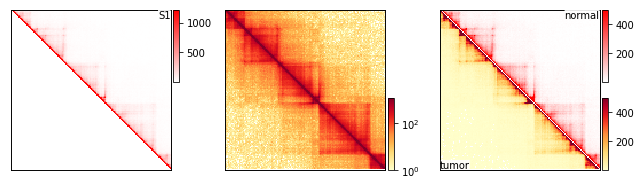

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(9,3))

tc.pl.mapC(mat=normal_2, ax=axs[0], map_type='square', label='S1', aspect=1)
tc.pl.mapC(mat2=tumor_2, ax=axs[1], map_type='square', symmetric=True, aspect=1, logdata=True)
tc.pl.mapC(mat=normal_2, mat2=tumor_2, ax=axs[2], map_type='square', aspect=1, maxrange=500, label=['normal', 'tumor'])

fig.tight_layout()

maxrange: 600 minrange: 1.0
maxrange: 600 minrange: 1.0
maxrange: 500 minrange: 1.0
maxrange: 500 minrange: 1.0


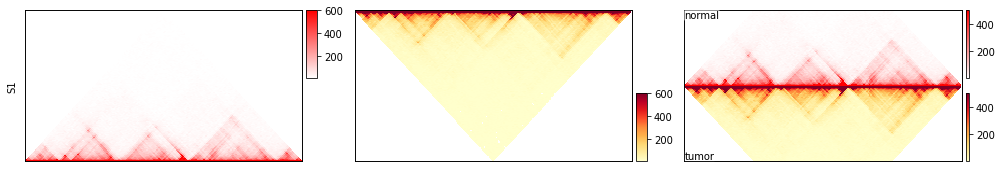

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(14,2.5))

tc.pl.mapC(mat=normal_2, ax=axs[0], map_type='triangle', label='S1', maxrange=600)
tc.pl.mapC(mat2=tumor_2, ax=axs[1], map_type='triangle', logdata=False, maxrange=600)
tc.pl.mapC(mat=normal_2, mat2=tumor_2, ax=axs[2], map_type='triangle', height=70, maxrange=500, label=['normal', 'tumor'])

fig.tight_layout()

maxrange: 600 minrange: 1.0
maxrange: 600 minrange: 1.0
maxrange: 500 minrange: 1.0
maxrange: 500 minrange: 1.0


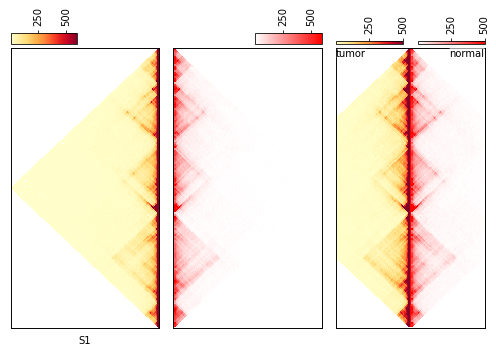

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(7,5))

tc.pl.mapC(mat2=normal_2, ax=axs[0], map_type='triangle', label='S1', maxrange=600, trans_ax=True)
tc.pl.mapC(mat=tumor_2, ax=axs[1], map_type='triangle', logdata=False, maxrange=600, trans_ax=True)
tc.pl.mapC(mat=normal_2, mat2=tumor_2, ax=axs[2], map_type='triangle', height=70, maxrange=500, label=['normal', 'tumor'], trans_ax=True)

fig.tight_layout()

maxrange: 500 minrange: 1.0
maxrange: 500 minrange: 1.0


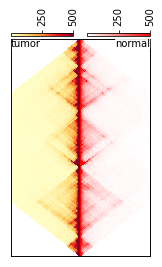

In [33]:
fig, axs = plt.subplots(1, 1, figsize=(2.5, 4))
tc.pl.mapC(mat=normal_2, mat2=tumor_2, ax=axs, map_type='triangle', height=70, maxrange=500, label=['normal', 'tumor'], trans_ax=True)
